


<p style="font-size:36px;text-align:center"> <b><h3>Deep Text Corrector</h3></b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html </p>

<p> Data: https://www.cs.cornell.edu/ or https://www.kaggle.com/datasets/rajathmc/cornell-moviedialog-corpus</p>
<p> Download 'data movie_texts.txt'</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/datasets/rajathmc/cornell-moviedialog-corpus</p>

<h6> Problem statement : </h6>
<p> Given the sentence with incorrect grammar, return the setence with grammar corrected </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.kaggle.com/datasets/rajathmc/cornell-moviedialog-corpus
2. https://proceedings.neurips.cc/paper/2014/file/a14ac55a4f27472c5d894ec1c3c743d2-Paper.pdf
3. https://arxiv.org/pdf/1409.3215.pdf

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* Decent latency requirement.
* Interpretability is not much important.
* Errors can be very costly.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/datasets/rajathmc/cornell-moviedialog-corpus
- We have files README.txt, chameleons.pdf, movie_characters_metadata.txt, movie_conversations.txt, movie_lines.txt, movie_titles_metadata.txt, raw_script_urls.txt 
- Data file movie_lines.txt's information:
    - contains the actual text of each utterance
    - fields:
        - lineID
        - characterID (who uttered this phrase)
        - movieID
        - character name
        - text of the utterance

<h3>2.1.2. Example Data Point</h3>

<h6>Data: movie_lines.txt</h6>
<hr>
lineID, characterID, movieID, character name, text of the utterance<br>
---------------------------------------------------------------------------------------------------------<br>
L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie." <br>
L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not! <br>
L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels? <br>


<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Deep Learning Problem</h3>

<p>
    The task is to correct the grammar of given sentence. It can be considered as Machine Tanslation task.
</p>

<h3>2.2.2. Performance Metric</h3>

Metric(s): 
* BLEU Score

<h3>2.2.3. Deep Learing Objectives and Constraints</h3>

<p> Objective: Given grammatically incorrect sentence, return the correct sentence.
</p>
<p> Constraints:
</p>
* Decent Interpretability<br>
* No Target Variable<br>
* Decent Latency constraints

<h2>2.3. Datasets</h2>

We use datafile 'movie_lines.txt'
- The file has 304714 datapoints containing the actual text of each utterance

<h1>3. Text Preprocessing</h1>

<h2>3.1 Reading Data</h2>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import regex as re
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random

In [2]:
movie_lines = open(os.getcwd()+'\data\\movie_lines.txt', encoding='utf-8', errors='ignore').read().split('\n') 

In [3]:
len(movie_lines)

304714

In [4]:
movie_lines[:10]

['L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!',
 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!',
 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.',
 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?',
 "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.",
 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow',
 "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.",
 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No',
 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?']

In [5]:
#Extract only dialogues from the data
lines__=[]
for line in movie_lines:
    lines__.append(line.lower().split('+++$+++ ')[-1])

In [6]:
len(lines__)

304714

In [7]:
lines__[10:20]

['the "real you".',
 'what good stuff?',
 "i figured you'd get to the good stuff eventually.",
 'thank god!  if i had to hear one more story about your coiffure...',
 "me.  this endless ...blonde babble. i'm like, boring myself.",
 'what crap?',
 'do you listen to this crap?',
 'no...',
 'then guillermo says, "if you go any lighter, you\'re gonna look like an extra on 90210."',
 'you always been this selfish?']

In [8]:
# https://stackoverflow.com/a/47091490/4084039
def text_preprocessor(phrase):
    
    phrase = phrase.lower()
    phrase = re.sub(r"i'm", "i am", phrase)
    phrase = re.sub(r"let's", "let us", phrase)
    phrase = re.sub(r"he's", "he is", phrase)
    phrase = re.sub(r"she's", "she is", phrase)
    phrase = re.sub(r"it's", "it is", phrase)
    phrase = re.sub(r"that's", "that is", phrase)
    phrase = re.sub(r"what's", "that is", phrase)
    phrase = re.sub(r"where's", "where is", phrase)
    phrase = re.sub(r"how's", "how is", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'re", " are", phrase)

    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    phrase = re.sub(r"don't", "do not", phrase)
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", "cannot", phrase)
    
    phrase = re.sub(r"they ain't", "they are not", phrase)
    phrase = re.sub(r"we ain't", "we are not", phrase)
    phrase = re.sub(r"you ain't", "you are not", phrase)
    phrase = re.sub(r"i ain't", "i am not", phrase)
    phrase = re.sub(r"ain't", "is not", phrase)
    phrase = re.sub(r"ain\'t", "is not", phrase)
    phrase = re.sub(r"n't", " not", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"n'", "ng", phrase)
    phrase = re.sub(r"'bout", "about", phrase)
    phrase = re.sub(r"'til", "until", phrase)


    phrase = re.sub(r"[-()\"#/@;:<>{}`+=~|]", "", phrase)
    phrase = re.sub("\S*\d\S*", "", phrase).strip()
    phrase = re.sub('[^A-Za-z]+', ' ', phrase)
    
    return phrase

In [9]:
text_corpus=pd.DataFrame(data=lines__, columns=['text'])

In [10]:
text_corpus=text_corpus

In [11]:
type(text_corpus['text'].values)

numpy.ndarray

<h2>3.1 Cleaning Data</h2>

In [12]:
#clean the text corpus
cleaned_text=[]
for line in tqdm(text_corpus['text'].values):
    #print(type(line))
    line=text_preprocessor(line)
    cleaned_text.append(line.strip())

100%|████████████████████████████████████████████████████████████████████████| 304714/304714 [01:19<00:00, 3822.09it/s]


In [13]:
cleaned_text[-15:]

['which one',
 'do you think she might be interested in someone',
 'well that is typical of her majesty is army appoint an engineer to do a soldier is work',
 'um there are rumours that my lord chelmsford intends to make durnford second in command',
 'lighting coghill cigar our good colonel dumford scored quite a coup with the sikali horse',
 'so far only their scouts but we have had reports of a small impi farther north over there',
 'and i assure you you do not in fact i would be obliged for your best advice what have your scouts seen',
 'well i assure you sir i have no desire to create difficulties',
 'i think chelmsford wants a good man on the border why he fears a flanking attack and requires a steady commander in reserve',
 'lord chelmsford seems to want me to stay back with my basutos',
 'i am to take the sikali with the main column to the river',
 'your orders mr vereker',
 'good ones yes mr vereker gentlemen who can ride and shoot',
 'colonel durnford william vereker i hear yo

In [14]:
cleaned_text=pd.DataFrame(data=cleaned_text, columns=['text'])

In [15]:
length_cleaned_text=list(cleaned_text['text'].str.split().apply(len))

<h2>4. Exploratory Data Analysis</h2>

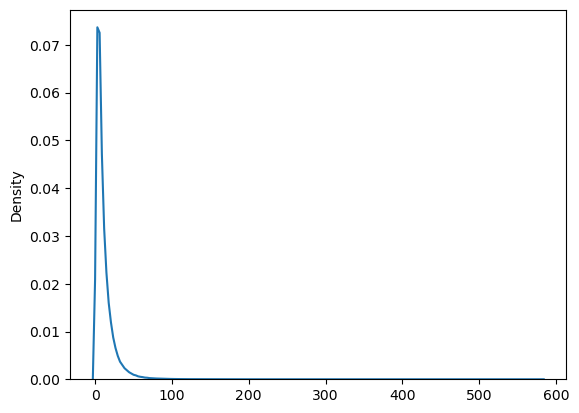

In [16]:
#kde plot of word length in every sentence
sns.kdeplot(x=length_cleaned_text)
plt.show()

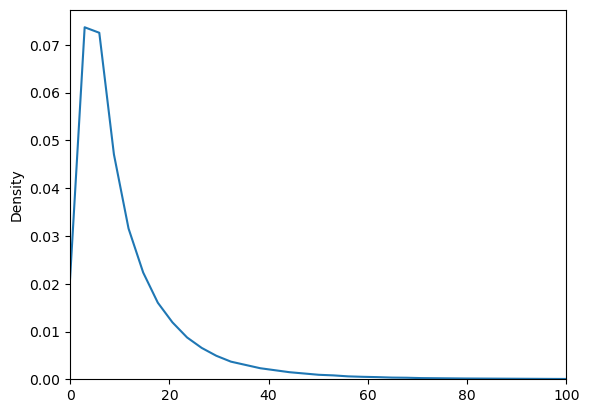

In [17]:
sns.kdeplot(x=length_cleaned_text)
plt.xlim((0,100))
plt.show()

In [19]:
max(length_cleaned_text)

581

In [21]:
min(length_cleaned_text)

0

### Observations
- We can see that more than 90% of the dialogues have word length less than 24

In [22]:
print(np.percentile(length_cleaned_text, np.arange(0,101,10)))
print(np.percentile(length_cleaned_text, np.arange(90,101)))
print(np.percentile(length_cleaned_text, np.arange(99.1,100.1, 0.1)))

[  0.   2.   3.   5.   6.   7.   9.  12.  16.  24. 581.]
[ 24.  25.  27.  28.  30.  33.  36.  41.  47.  60. 581.]
[ 62.          64.          67.          70.          74.
  80.          86.861       96.         117.         580.99999999]


In [23]:
cleaned_text.shape

(304714, 1)

In [24]:
mask=cleaned_text['text'].str.split().apply(len)

In [25]:
#keep only sentences that have word lenght of atmost 20
cleaned_text_filtered=cleaned_text.loc[((mask > 1) & (mask < 21))]

In [26]:
cleaned_text_filtered=cleaned_text_filtered.reset_index(drop=True)

In [27]:
cleaned_text_filtered.shape

(240690, 1)

In [28]:
cleaned_text_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240690 entries, 0 to 240689
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    240690 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [29]:
cleaned_text_filtered.to_pickle(os.getcwd()+'\data\cleaned_filtered_text.pkl')

In [30]:
data=pd.read_pickle(os.getcwd()+'\data\cleaned_filtered_text.pkl')

In [31]:
type(data['text'].tail(10).values)

numpy.ndarray

<h2>4. Data Perturbation</h2>
<br>
Since we don't have target data on which the data cant be trained, we take the movies dialogues and manually introduce some grammar mistakes. This purtubated data serves as target data 

In [32]:
def perturbate_text(text):
    choice_list=[1,2,3,4,5]
    split_text=text.split()

    #######################################       1           #################################################       
        
    if random.choice(choice_list) == 1:
        if 'a' in split_text:
            text=re.sub(r'\ba\b', '', text)

        if 'an' in split_text:
            text=re.sub(r'\ban\b', '', text)

        if 'the' in split_text:
            text=re.sub(r'\bthe\b', '', text)

        if 'is' in split_text:
            text=re.sub(r'\bis\b', 'is', text)

        if 'are' in split_text:
            text=re.sub(r'\bare\b', 'are', text)

        if 'am' in split_text:
            text=re.sub(r'\bam\b', 'am', text)

        if 'was' in split_text:
            text=re.sub(r'\bwas\b', 'was', text)

        if 'were' in split_text:
            text=re.sub(r'\bwere\b', 'were', text)

        if 'he' in split_text:
            text=re.sub(r'\bhe\b', 'he', text)

        if 'she' in split_text:
            text=re.sub(r'\bshe\b', 'she', text)

        if 'it' in split_text:
            text=re.sub(r'\bit\b', 'it', text)

        if 'them' in split_text:
            text=re.sub(r'\bthem\b', 'them', text)

        if 'they' in split_text:
            text=re.sub(r'\bthey\b', 'they', text)

        if 'may' in split_text:
            text=re.sub(r'\bit\b', '', text)

        if 'then' in split_text:
            text=re.sub(r'\bthem\b', 'then', text)

        if 'their' in split_text:
            text=re.sub(r'\bthey\b', '', text)
        
        if 'there' in split_text:
            text=re.sub(r'\there\b', '', text)
            
    #######################################       2           #################################################       
    
    if random.choice(choice_list) == 2:
        if 'a' in split_text:
            text=re.sub(r'\ba\b', 'an', text)
            
        if 'an' in split_text:
            text=re.sub(r'\ban\b', 'a', text)

        if 'the' in split_text:
            text=re.sub(r'\bthe\b', '', text)

        if 'is' in split_text:
            text=re.sub(r'\bis\b', 'is', text)

        if 'are' in split_text:
            text=re.sub(r'\bare\b', 'are', text)

        if 'am' in split_text:
            text=re.sub(r'\bam\b', 'am', text)

        if 'was' in split_text:
            text=re.sub(r'\bwas\b', 'were', text)

        if 'were' in split_text:
            text=re.sub(r'\bwere\b', 'was', text)

        if 'he' in split_text:
            text=re.sub(r'\bhe\b', 'he', text)

        if 'she' in split_text:
            text=re.sub(r'\bshe\b', 'she', text)

        if 'it' in split_text:
            text=re.sub(r'\bit\b', 'it', text)

        if 'them' in split_text:
            text=re.sub(r'\bthem\b', 'them', text)

        if 'they' in split_text:
            text=re.sub(r'\bthey\b', 'they', text)

        if 'may' in split_text:
            text=re.sub(r'\bit\b', '', text)

        if 'then' in split_text:
            text=re.sub(r'\bthem\b', 'then', text)

        if 'their' in split_text:
            text=re.sub(r'\bthey\b', '', text)
        
        if 'there' in split_text:
            text=re.sub(r'\there\b', '', text)            
            
    #######################################       3           #################################################
    
    if random.choice(choice_list) == 3:
        if 'a' in split_text:
            text=re.sub(r'\ba\b', '', text)
            
        if 'an' in split_text:
            text=re.sub(r'\ban\b', 'an', text)

        if 'the' in split_text:
            text=re.sub(r'\bthe\b', '', text)

        if 'is' in split_text:
            text=re.sub(r'\bis\b', 'is', text)

        if 'are' in split_text:
            text=re.sub(r'\bare\b', 'were', text)

        if 'am' in split_text:
            text=re.sub(r'\bam\b', '', text)

        if 'was' in split_text:
            text=re.sub(r'\bwas\b', '', text)

        if 'were' in split_text:
            text=re.sub(r'\bwere\b', '', text)

        if 'he' in split_text:
            text=re.sub(r'\bhe\b', 'he', text)

        if 'she' in split_text:
            text=re.sub(r'\bshe\b', 'she', text)

        if 'it' in split_text:
            text=re.sub(r'\bit\b', 'it', text)

        if 'them' in split_text:
            text=re.sub(r'\bthem\b', 'them', text)

        if 'they' in split_text:
            text=re.sub(r'\bthey\b', 'they', text)

        if 'may' in split_text:
            text=re.sub(r'\bit\b', 'may', text)

        if 'then' in split_text:
            text=re.sub(r'\bthem\b', 'then', text)

        if 'their' in split_text:
            text=re.sub(r'\bthey\b', 'they', text)
        
        if 'there' in split_text:
            text=re.sub(r'\there\b', 'there', text)
            
            
    #######################################      4          ################################################# 
    
    if random.choice(choice_list) == 4:
        if 'a' in split_text:
            text=re.sub(r'\ba\b', '', text)
            
        if 'an' in split_text:
            text=re.sub(r'\ban\b', 'an', text)

        if 'the' in split_text:
            text=re.sub(r'\bthe\b', '', text)

        if 'is' in split_text:
            text=re.sub(r'\bis\b', 'was', text)

        if 'are' in split_text:
            text=re.sub(r'\bare\b', 'are', text)

        if 'am' in split_text:
            text=re.sub(r'\bam\b', 'am', text)

        if 'was' in split_text:
            text=re.sub(r'\bwas\b', 'were', text)

        if 'were' in split_text:
            text=re.sub(r'\bwere\b', 'was', text)

        if 'he' in split_text:
            text=re.sub(r'\bhe\b', 'he', text)

        if 'she' in split_text:
            text=re.sub(r'\bshe\b', 'she', text)

        if 'it' in split_text:
            text=re.sub(r'\bit\b', 'it', text)

        if 'them' in split_text:
            text=re.sub(r'\bthem\b', 'them', text)

        if 'they' in split_text:
            text=re.sub(r'\bthey\b', 'they', text)
            
        if 'may' in split_text:
            text=re.sub(r'\bit\b', 'may', text)

        if 'then' in split_text:
            text=re.sub(r'\bthem\b', 'then', text)
            
        if 'may' in split_text:
            text=re.sub(r'\bit\b', 'would', text)

        if 'then' in split_text:
            text=re.sub(r'\bthem\b', 'than', text)

        if 'their' in split_text:
            text=re.sub(r'\bthey\b', 'there', text)
        
        if 'there' in split_text:
            text=re.sub(r'\there\b', 'their', text)
         
    #######################################       5           ################################################# 
    
    if random.choice(choice_list) == 5:
        if 'a' in split_text:
            text=re.sub(r'\ba\b', '', text)
            
        if 'an' in split_text:
            text=re.sub(r'\ban\b', 'an', text)

        if 'the' in split_text:
            text=re.sub(r'\bthe\b', '', text)

        if 'is' in split_text:
            text=re.sub(r'\bis\b', '', text)

        if 'are' in split_text:
            text=re.sub(r'\bare\b', 'are', text)

        if 'am' in split_text:
            text=re.sub(r'\bam\b', 'am', text)

        if 'was' in split_text:
            text=re.sub(r'\bwas\b', 'was', text)

        if 'were' in split_text:
            text=re.sub(r'\bwere\b', 'were', text)

        if 'he' in split_text:
            text=re.sub(r'\bhe\b', '', text)

        if 'she' in split_text:
            text=re.sub(r'\bshe\b', '', text)

        if 'it' in split_text:
            text=re.sub(r'\bit\b', 'it', text)

        if 'them' in split_text:
            text=re.sub(r'\bthem\b', 'them', text)

        if 'they' in split_text:
            text=re.sub(r'\bthey\b', 'they', text)
            
        if 'may' in split_text:
            text=re.sub(r'\bit\b', 'may', text)

        if 'then' in split_text:
            text=re.sub(r'\bthem\b', '', text)

        if 'their' in split_text:
            text=re.sub(r'\bthey\b', '', text)
        
        if 'there' in split_text:
            text=re.sub(r'\there\b', '', text)
         
    return text.replace("  ", " ").strip()

In [33]:
perturbated_text=list()
for text in data['text'].values:
    perturbated_text.append(perturbate_text(text))

In [34]:
data['perturbated text']=perturbated_text

In [35]:
data.loc[21]

text                i looked for you back at the party but you alw...
perturbated text    i looked for you back at party but you always ...
Name: 21, dtype: object

In [36]:
data.sample(10)

,text,perturbated text
53822,so that is wrong,so that was wrong
17519,you are actually having sex with your own litt...,you are actually having sex with your own litt...
117154,it is a damn easy thing to play with,it is damn easy thing to play with
24315,oh bullshit,oh bullshit
82956,michael you are trying to scare me,michael you are trying to scare me
52978,what about it,what about it
212885,jeff jeff,jeff jeff
19641,people are not that simple,people were not that simple
78791,you you cannot even get from sausalito to san ...,you you cannot even get from sausalito to san ...
24374,then why weep for him,then why weep for him


In [37]:
data.to_pickle(os.getcwd()+'\\data\\text_perturbed_text.pkl')

In [38]:
os.getcwd()

'C:\\Users\\Bazinga\\AAIC\\Deep Text Corrector'

<h2>5. Teacher Forcing</h2>

The EOS token is important for the decoder as well: the explicit "eos" token allows the decoder to emit arbitrary-length sequences. The decoder will tell us when it's done emitting tokens: without an "eos" token, we would have no idea when the decoder is done talking to us and continuing to emit tokens will produce gibberish.

The start-of-sequence (sos) token is more important for the decoder: the decoder will progress by taking the tokens it emits as inputs (along with the embedding and hidden state, or using the embedding to initialize the hidden state), so before it has emitted anything it needs a token of some kind to start with. Hence, the "sos" token.

In [39]:
#https://medium.com/analytics-vidhya/encoder-decoder-seq2seq-models-clearly-explained-c34186fbf49b
enc_dec_data=zip(data['perturbated text'].values, 'sos '+data['text'].values, data['text'].values+' eos')
enc_dec_data=pd.DataFrame(data=enc_dec_data, columns=['enc_inp', 'dec_inp', 'dec_out'])
enc_dec_data[100:110]

,enc_inp,dec_inp,dec_out
100,i do care but i am a firm believer in doing so...,sos i do care but i am a firm believer in doin...,i do care but i am a firm believer in doing so...
101,like you care,sos like you care,like you care eos
102,listen i know you hate having to sit home beca...,sos listen i know you hate having to sit home ...,listen i know you hate having to sit home beca...
103,you are welcome,sos you are welcome,you are welcome eos
104,i really do not think i need any social advice...,sos i really do not think i need any social ad...,i really do not think i need any social advice...
105,bianca i need to talk to you i need to tell you,sos bianca i need to talk to you i need to tel...,bianca i need to talk to you i need to tell yo...
106,can we go now,sos can we go now,can we go now eos
107,you were so completely unbalanced,sos you are so completely unbalanced,you are so completely unbalanced eos
108,it was shakespeare maybe you have heard of him,sos it is shakespeare maybe you have heard of him,it is shakespeare maybe you have heard of him eos
109,like i am supposed to know what that even means,sos like i am supposed to know what that even ...,like i am supposed to know what that even mean...


In [40]:
enc_dec_data.to_pickle(os.getcwd()+'\data\enc_dec_data.pkl')

<h2>5. Train Test Validatin Split</h2>

In [41]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(enc_dec_data, test_size=0.15)
train_data,validation_data=train_test_split(train_data, test_size=0.20)

In [42]:
print(train_data.shape)
print(test_data.shape)
print(validation_data.shape)

(163668, 3)
(36104, 3)
(40918, 3)


In [43]:
train_data.to_pickle(os.getcwd()+'\\data\\train_data.pkl')
train_data.to_csv(os.getcwd()+'\\data\\train_data.csv')
test_data.to_pickle(os.getcwd()+'\\data\\test_data.pkl')
test_data.to_csv(os.getcwd()+'\\data\\test_data.csv')
validation_data.to_pickle(os.getcwd()+'\\data\\validation_data.pkl')
validation_data.to_csv(os.getcwd()+'\\data\\validation_data.csv')

In [44]:
# We add <EOS> for a text so that tokenizer learns
# with this we can use only one tokenizer for both decoder input and output


train_data.iloc[0]['dec_inp']= str(train_data.iloc[0]['dec_inp'])+' eos'


#train_data.iloc[0]['dec_out']= str(train_data.iloc[0]['dec_out'])+' eos'

In [45]:
train_data.tail(1)

,enc_inp,dec_inp,dec_out
221054,we saw each other a little while ago,sos we saw each other a little while ago,we saw each other a little while ago eos


<h2>5. Tokenizing, Padding and GloveVectors</h2>

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

perturbated_text_tokernizer=Tokenizer()
text_inp_tokernizer=Tokenizer()

perturbated_text_tokernizer.fit_on_texts(train_data['enc_inp'].values)
text_inp_tokernizer.fit_on_texts(train_data['dec_inp'].values)
#text_inp_tokernizer.fit_on_texts(train_data['dec_out'].values)

In [47]:
perturbated_text_train=np.array(perturbated_text_tokernizer.texts_to_sequences(train_data['enc_inp'].values))
text_inp_train=np.array(text_inp_tokernizer.texts_to_sequences(train_data['dec_inp'].values))
text_out_train=np.array(text_inp_tokernizer.texts_to_sequences(train_data['dec_out'].values))

In [48]:
perturbated_text_train = np.array(pad_sequences(perturbated_text_train,maxlen=20,padding="post",truncating='post'))
text_inp_train = np.array(pad_sequences(text_inp_train,maxlen=20,padding="post",truncating='post'))
text_out_train = np.array(pad_sequences(text_out_train,maxlen=20,padding="post",truncating='post'))

In [49]:
train_data['enc_inp'].iloc[26]

'who that'

In [50]:
perturbated_text_train[26]

array([70,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

In [51]:
pickle.dump(perturbated_text_train, open(os.getcwd()+'\\data\\perturbated_text_train.pkl','wb'))
pickle.dump(text_inp_train, open(os.getcwd()+'\\data\\text_inp_train.pkl','wb'))
pickle.dump(text_out_train, open(os.getcwd()+'\\data\\text_out_train.pkl','wb'))

In [52]:
text_inp_tokernizer.word_index.get('francisco')

2746

In [53]:
train_data['enc_inp'].iloc[26]

'who that'

In [54]:
text_inp_tokernizer_word_index=text_inp_tokernizer.word_index
perturbated_text_tokernizer_index=perturbated_text_tokernizer.word_index

pickle.dump(text_inp_tokernizer_word_index, open(os.getcwd()+'\\data\\text_inp_tokernizer_word_index.pkl','wb'))
pickle.dump(perturbated_text_tokernizer_index, open(os.getcwd()+'\\data\\perturbated_text_tokernizer_index.pkl','wb'))
pickle.dump(text_inp_tokernizer, open(os.getcwd()+'\\data\\text_inp_tokernizer.pkl','wb'))
pickle.dump(perturbated_text_tokernizer, open(os.getcwd()+'\\data\\perturbated_text_tokernizer.pkl','wb'))

print(len(text_inp_tokernizer_word_index))
print(len(perturbated_text_tokernizer_index))

34773
34772


In [55]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
'''glove_vectors=dict()
filename=os.getcwd()+'/data/glove.6B.300d.txt'
with open(filename, 'rb') as f:
    for l in f:
        glove_vector = l.split()
        glove_word = glove_vector[0]
        glove_coefs = np.asarray(glove_vector[1:], dtype='float32')
        glove_vectors[glove_word] = glove_coefs
    f.close()
    '''

"glove_vectors=dict()\nfilename=os.getcwd()+'/data/glove.6B.300d.txt'\nwith open(filename, 'rb') as f:\n    for l in f:\n        glove_vector = l.split()\n        glove_word = glove_vector[0]\n        glove_coefs = np.asarray(glove_vector[1:], dtype='float32')\n        glove_vectors[glove_word] = glove_coefs\n    f.close()\n    "

In [56]:
#pickle.dump(glove_vectors, open(os.getcwd()+'\\data\\glove_vectors.pkl','wb'))

In [57]:
f = open('./data/glove_vectors.pkl','rb')
glove_vectors = pickle.load(f)
f.close()

In [58]:
#glove_vectors.get('book')
len(glove_vectors)

400000

In [59]:
#https://www.geeksforgeeks.org/pre-trained-word-embedding-using-glove-in-nlp-models/

text_embed_matrix=np.zeros((len(text_inp_tokernizer_word_index)+1, 300))
for word, index in text_inp_tokernizer_word_index.items():
    if glove_vectors.get(word) is not None:
        text_embed_matrix[index]=glove_vectors.get(word)
        
perturbated_text_embed_matrix=np.zeros((len(perturbated_text_tokernizer_index)+1, 300))
for word, index in perturbated_text_tokernizer_index.items():
    if glove_vectors.get(word) is not None:
        perturbated_text_embed_matrix[index]=glove_vectors.get(word)


In [60]:
print(text_embed_matrix.shape)
print(perturbated_text_embed_matrix.shape)

(34774, 300)
(34773, 300)


In [61]:
pickle.dump(text_embed_matrix, open(os.getcwd()+'\\data\\text_embed_matrix.pkl','wb'))

In [62]:
pickle.dump(perturbated_text_embed_matrix, open(os.getcwd()+'\\data\\perturbated_text_embed_matrix.pkl','wb'))

In [63]:
f = open('./data/text_embed_matrix.pkl','rb')
text_embed_matrix = pickle.load(f)
f.close()

In [64]:
f = open('./data/perturbated_text_embed_matrix.pkl','rb')
perturbated_text_embed_matrix = pickle.load(f)
f.close()

In [65]:
#https://fasttext.cc/docs/en/crawl-vectors.html
'''import io
import pickle
import os
from tqdm import tqdm

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    #for line in tqdm(fin):
    for i, line in enumerate(tqdm(fin)):
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
        if (i%50000==0):
            print(i)
    fin.close()
    return data

fname=os.getcwd()+'\\data\\wiki-news-300d-1M.vec'
ft_vectors=load_vectors(fname)'''

"import io\nimport pickle\nimport os\nfrom tqdm import tqdm\n\ndef load_vectors(fname):\n    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')\n    n, d = map(int, fin.readline().split())\n    data = {}\n    #for line in tqdm(fin):\n    for i, line in enumerate(tqdm(fin)):\n        tokens = line.rstrip().split(' ')\n        data[tokens[0]] = map(float, tokens[1:])\n        if (i%50000==0):\n            print(i)\n    fin.close()\n    return data\n\nfname=os.getcwd()+'\\data\\wiki-news-300d-1M.vec'\nft_vectors=load_vectors(fname)"